In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\priya\Downloads\zomato_data.csv')


In [3]:
df.head()


,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [4]:
df.isnull().sum()


online_order                     0
book_table                       0
rate                          7775
votes                            0
rest_type                      227
dish_liked                   28078
cuisines                        45
approx_costfor_two_people      346
listed_intype                    0
listed_incity                    0
dtype: int64

In [5]:
df['rate'] = df['rate'].fillna(df['rate'].median())


TypeError: could not convert string to float: '4.1/5'

In [6]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)


ValueError: could not convert string to float: 'NEW'

In [7]:
df['rate'] = pd.to_numeric(df['rate'].str.split('/').str[0], errors='coerce')


In [8]:
df['rate'] = df['rate'].fillna(df['rate'].median())


In [9]:
df = df.dropna(thresh=len(df.columns)-2)  # Drops rows with more than 2 missing values


In [10]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51691 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51691 non-null  object 
 1   book_table                 51691 non-null  object 
 2   rate                       51691 non-null  float64
 3   votes                      51691 non-null  int64  
 4   rest_type                  51485 non-null  object 
 5   dish_liked                 23639 non-null  object 
 6   cuisines                   51672 non-null  object 
 7   approx_costfor_two_people  51371 non-null  object 
 8   listed_intype              51691 non-null  object 
 9   listed_incity              51691 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [11]:
df['rest_type'].value_counts()
df['cuisines'].value_counts()


North Indian                               2913
North Indian, Chinese                      2385
South Indian                               1828
Biryani                                     918
Bakery, Desserts                            911
                                           ... 
Chinese, Street Food, Ice Cream               1
South Indian, Asian                           1
South Indian, Fast Food, Juices               1
South Indian, Mangalorean, Chinese            1
Mughlai, Biryani, Chinese, North Indian       1
Name: cuisines, Length: 2723, dtype: int64

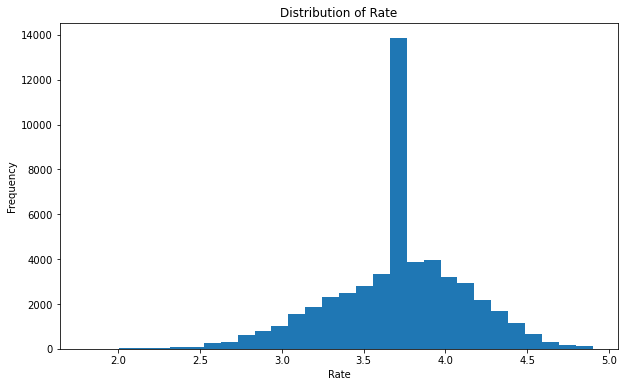

In [12]:
df['rate'].plot(kind='hist', bins=30, figsize=(10,6))
plt.title('Distribution of Rate')
plt.xlabel('Rate')
plt.show()


In [13]:
df.shape


(51691, 10)

In [14]:
df[df['cuisines'].str.contains('North Indian', na=False)].shape[0]


21085

In [15]:
df['cuisines'].value_counts().head(1)


North Indian    2913
Name: cuisines, dtype: int64

In [16]:
df.groupby('listed_incity')['approx_costfor_two_people'].mean().idxmax()


DataError: No numeric types to aggregate

In [17]:
df['approx_costfor_two_people'] = pd.to_numeric(df['approx_costfor_two_people'], errors='coerce')


In [18]:
df.groupby('listed_incity')['approx_costfor_two_people'].mean().idxmax()


'Brigade Road'

In [19]:

localities = ['Banashankari', 'Church Street', 'Indiranagar', 'Whitefield']
df_filtered = df[df['listed_incity'].isin(localities)]


avg_cost_localities = df_filtered.groupby('listed_incity')['approx_costfor_two_people'].mean()
print(avg_cost_localities)


listed_incity
Banashankari     380.522619
Church Street    428.493789
Indiranagar      424.781122
Whitefield       423.994211
Name: approx_costfor_two_people, dtype: float64


In [20]:
df[df['votes'] > 1000][df['rate'].astype(float) > 4].groupby('rest_type').size().idxmax()


<ipython-input-20-881e6d4e33f7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['votes'] > 1000][df['rate'].astype(float) > 4].groupby('rest_type').size().idxmax()


'Casual Dining'

In [21]:
df['approx_costfor_two_people'].min()


40.0

In [22]:

df['approx_costfor_two_people'] = pd.to_numeric(df['approx_costfor_two_people'], errors='coerce')


df_cleaned = df.dropna(subset=['approx_costfor_two_people'])


min_cost = df_cleaned['approx_costfor_two_people'].min()
print(f"The minimum cost for two people is: ₹{int(min_cost)}")


The minimum cost for two people is: ₹40


In [23]:

df_cleaned['approx_costfor_two_people'].value_counts().sort_index().head(10)


40.0        8
50.0        8
60.0        1
70.0        3
80.0       10
100.0     993
120.0      24
130.0       8
140.0       2
150.0    2066
Name: approx_costfor_two_people, dtype: int64

In [24]:
banashankari_orders = df[df['listed_incity'] == 'Banashankari']['online_order'].value_counts(normalize=True)['Yes'] * 100
banashankari_orders


63.26767091541136

In [25]:

online_orders = df_cleaned[df_cleaned['online_order'] == 'Yes']


banashankari_orders = online_orders[online_orders['listed_incity'] == 'Banashankari']


percentage = (len(banashankari_orders) / len(online_orders)) * 100
print(f"Banashankari online order percentage: {percentage:.2f}%")


Banashankari online order percentage: 1.94%


In [26]:

ban_df = df[df['listed_incity'] == 'Banashankari']


ban_online_pct = (
    ban_df['online_order']
      .value_counts(normalize=True)  # fraction of Yes vs No
      .get('Yes', 0) * 100           # percentage of 'Yes'
)

print(f"Percentage of Banashankari restaurants with online ordering: {ban_online_pct:.2f}%")


Percentage of Banashankari restaurants with online ordering: 63.27%


In [27]:
df[(df['votes'] > 500) & (df['rate'].astype(float) < 3.0)].groupby('listed_incity').size().idxmax()


'Brookefield'

In [28]:
df.groupby('listed_incity')['rest_type'].nunique().idxmax()


'BTM'

In [29]:
buffet_cost = df[df['rest_type'].str.contains('Buffet', na=False)]['approx_costfor_two_people'].mean()
delivery_cost = df[df['rest_type'].str.contains('Delivery', na=False)]['approx_costfor_two_people'].mean()
buffet_cost - delivery_cost


nan

In [30]:

df['approx_costfor_two_people'] = pd.to_numeric(df['approx_costfor_two_people'], errors='coerce')


df_clean = df.dropna(subset=['approx_costfor_two_people'])


buffet_mean = df_clean[
    df_clean['rest_type'].str.contains('Buffet', na=False)
]['approx_costfor_two_people'].mean()


delivery_mean = df_clean[
    df_clean['rest_type'].str.contains('Delivery', na=False)
]['approx_costfor_two_people'].mean()


cost_diff = buffet_mean - delivery_mean

print(f"Avg cost (Buffet): ₹{buffet_mean:.2f}")
print(f"Avg cost (Delivery): ₹{delivery_mean:.2f}")
print(f"Difference:      ₹{cost_diff:.2f}")


Avg cost (Buffet): ₹nan
Avg cost (Delivery): ₹410.02
Difference:      ₹nan


In [31]:

print(df['listed_intype'].value_counts())


buffet_mean = df_clean[df_clean['listed_intype'] == 'Buffet']['approx_costfor_two_people'].mean()


delivery_mean = df_clean[df_clean['listed_intype'] == 'Delivery']['approx_costfor_two_people'].mean()


cost_diff = buffet_mean - delivery_mean

print(f"Avg cost (Buffet):   ₹{buffet_mean:.2f}")
print(f"Avg cost (Delivery): ₹{delivery_mean:.2f}")
print(f"Difference:          ₹{cost_diff:.2f}")


Delivery              25933
Dine-out              17768
Desserts               3592
Cafes                  1722
Drinks & nightlife     1101
Buffet                  878
Pubs and bars           697
Name: listed_intype, dtype: int64
Avg cost (Buffet):   ₹721.40
Avg cost (Delivery): ₹409.38
Difference:          ₹312.02


In [32]:
df[df['online_order'] == 'Yes']['votes'].max()


16832

In [33]:
df[(df['cuisines'].str.contains('North Indian', na=False)) & (df['cuisines'].str.contains('Chinese', na=False))]['rate'].astype(float).mean()


3.591908021765807

In [34]:
df['strike_rate'] = (df['votes'] / df['approx_costfor_two_people']) * 100
df.groupby('listed_incity')['strike_rate'].mean().idxmax()


'Basavanagudi'

In [35]:
import pandas as pd


df['approx_costfor_two_people'] = pd.to_numeric(df['approx_costfor_two_people'], errors='coerce')


df_clean = df.dropna(subset=['approx_costfor_two_people', 'votes'])


df_clean['strike_rate'] = (df_clean['votes'] / df_clean['approx_costfor_two_people']) * 100


areas = ['Brookefield', 'Koramangala 8th Block', 'Koramangala 7th Block', 'Bellandur']
sr = (
    df_clean[df_clean['listed_incity'].isin(areas)]
      .groupby('listed_incity')['strike_rate']
      .mean()
)

print(sr)
print("Most profitable area:", sr.idxmax())


listed_incity
Bellandur                21.784936
Brookefield              25.541825
Koramangala 7th Block    43.045918
Name: strike_rate, dtype: float64
Most profitable area: Koramangala 7th Block


<ipython-input-35-35891c8dc913>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['strike_rate'] = (df_clean['votes'] / df_clean['approx_costfor_two_people']) * 100


In [36]:
df[df['rate'].astype(float) < 3.0]['rest_type'].value_counts().idxmax()


'Quick Bites'

In [37]:
df[(df['rate'].astype(float) > 4.2) & (df['votes'] > 500) & (df['online_order'] == 'Yes')]['listed_incity'].value_counts().idxmax()


'MG Road'